Congrats! You just graduated UVA's BSDS program and got a job working at a movie studio in Hollywood. 

Your boss is the head of the studio and wants to know if they can gain a competitive advantage by predicting new movies that might get high imdb scores (movie rating). 

You would like to be able to explain the model to mere mortals but need a fairly robust and flexible approach so you've chosen to use decision trees to get started. 

In doing so, similar to  great data scientists of the past you remembered the excellent education provided to you at UVA in a undergrad data science course and have outline 20ish steps that will need to be undertaken to complete this task. As always, you will need to make sure to #comment your work heavily. 

 Footnotes: 
-	You can add or combine steps if needed
-	Also, remember to try several methods during evaluation and always be mindful of how the model will be used in practice.
- Make sure all your variables are the correct type (factor, character,numeric, etc.)

In [2]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [3]:
df_movies=pd.read_csv("data/movie_metadata.csv")

#2 Ensure all the variables are classified correctly including the target variable and collapse factor variables as needed.

In [4]:
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#3 Check for missing variables and correct as needed.

In [5]:
#remove columns with an egregious amount of NA's 
def get_cols_with_na(df, threshold):
    cols_to_remove = []
    
    for col in df_movies.columns:
        if (df[col].isna().sum()/len(df[col]) >= threshold):
            cols_to_remove.append(col)
    
    return cols_to_remove

In [6]:
threshold = 0.1

na_cols = get_cols_with_na(df_movies, threshold)

df_movies_dropped = df_movies.drop(columns=na_cols)

df_movies_dropped.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
#going to just arbitrarily fill continuous with the average and categorical with most frequent
from sklearn.impute import SimpleImputer

numerical_columns = df_movies_dropped.select_dtypes(include = ['int', 'float']).columns
categorical_columns = df_movies_dropped.select_dtypes(include = ['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_movies_dropped[numerical_columns] = num_imputer.fit_transform(df_movies_dropped[numerical_columns])
df_movies_dropped[categorical_columns] = cat_imputer.fit_transform(df_movies_dropped[categorical_columns])

In [8]:
#all NA's imputed:
df_movies_dropped.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

#4 Guess what, you don't need to scale the data, because DTs don't require this to be done, they make local greedy decisions...keeps getting easier, go to the next step.

In [9]:
#Nice!

#5 Determine the baserate or prevalence for the classifier, what does this number mean?

In [16]:
prevalence = len(df_movies_dropped[df_movies_dropped['content_rating']=="R"]) / len(df_movies_dropped)

print(f"Prevalence: {prevalence}")

# this number means that for our predicted class, which is R movies, 48% of the values are R movies, giving us a good breadth of data to train from

Prevalence: 0.48007138607971445


#6 Split your data into test, tune, and train. (80/10/10)

In [65]:
#One hot encode categoricals with reasonable value_counts() 


cols_to_drop = ['movie_imdb_link', 'plot_keywords', 'movie_title', 'genres', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name']

#these columns have so many unique values the encoded datafrme would be massive, scikit learn doesn't support actual categorical values
df_movies_dropped2 = df_movies_dropped.drop(columns=cols_to_drop)

In [75]:
from sklearn.model_selection import train_test_split


X = df_movies_dropped2.drop(columns='content_rating')
y = df_movies_dropped2['content_rating']

#transform y such that it is 0 if y != "R" and 1 if y=="R"
y = [1 if val=="R" else 0 for val in y]

#encode categorical columns:
cat_columns = X.select_dtypes(include = ['object']).columns

X = pd.get_dummies(X, columns = cat_columns, drop_first=True)

#split for training
X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=0.8, random_state=42)

#split for tune and test

X_tune, X_test, y_tune, y_test = train_test_split(X_rest, y_rest, train_size=0.5, random_state=42)


#7 Create the kfold object for cross validation.

In [76]:
from sklearn.model_selection import KFold

# Define the number of folds (K)
n_splits = 5  # You can choose the number of splits you want

# Create a K-Fold cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

#8 Create the scoring metric you will use to evaluate your model and the max depth hyperparameter 

In [77]:
scoring = ['roc_auc','recall', 'precision', 'balanced_accuracy']

params = {"max_depth": [1,3,5,7,9,11,13], }

#9 Build the classifier object 

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

#10 Use the kfold object and the scoring metric to find the best hyperparameter value for max depth via the grid search method.

#11 Fit the model to the training data.

In [79]:
from sklearn.model_selection import GridSearchCV
from IPython.display import clear_output

# Create a GridSearchCV object with K-Fold cross-validation
grid_search = GridSearchCV(model, params, cv=kf, scoring=scoring, refit="roc_auc")

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values and corresponding MSE score
best_max_depth = grid_search.best_params_
best_mse = grid_search.best_score_ 

#12 What is the best depth value?

In [80]:
print(f"Best MSE {best_mse}")
print(f"Best Deptth {best_max_depth}")

Best MSE 0.6918143747161392
Best Deptth {'max_depth': 7}


#13 Print out the model

In [81]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7)

#14 View the results, comment on how the model performed using several evaluation metrics.

In [118]:
results = grid_search.cv_results_

# Access the mean and standard deviation scores for each scoring metric
for metric in scoring:
    mean_scores = results['mean_test_' + metric]
    std_scores = results['std_test_' + metric]
    
    print(f'Scores for {metric}:')
    for mean, std, params in zip(mean_scores, std_scores, results['params']):
        print(f'Mean: {mean:.4f}, Std: {std:.4f}, Params: {params}')

Scores for roc_auc:
Mean: 0.5881, Std: 0.0079, Params: {'max_depth': 1}
Mean: 0.6609, Std: 0.0212, Params: {'max_depth': 3}
Mean: 0.6861, Std: 0.0172, Params: {'max_depth': 5}
Mean: 0.6918, Std: 0.0128, Params: {'max_depth': 7}
Mean: 0.6708, Std: 0.0088, Params: {'max_depth': 9}
Mean: 0.6467, Std: 0.0151, Params: {'max_depth': 11}
Mean: 0.6274, Std: 0.0107, Params: {'max_depth': 13}
Scores for recall:
Mean: 0.9204, Std: 0.0068, Params: {'max_depth': 1}
Mean: 0.5259, Std: 0.1988, Params: {'max_depth': 3}
Mean: 0.6698, Std: 0.0389, Params: {'max_depth': 5}
Mean: 0.7003, Std: 0.0522, Params: {'max_depth': 7}
Mean: 0.6791, Std: 0.0234, Params: {'max_depth': 9}
Mean: 0.6497, Std: 0.0195, Params: {'max_depth': 11}
Mean: 0.6315, Std: 0.0109, Params: {'max_depth': 13}
Scores for precision:
Mean: 0.5384, Std: 0.0129, Params: {'max_depth': 1}
Mean: 0.6224, Std: 0.0387, Params: {'max_depth': 3}
Mean: 0.6248, Std: 0.0291, Params: {'max_depth': 5}
Mean: 0.6195, Std: 0.0145, Params: {'max_depth': 7}

In [119]:

"""
Model performs very well as we scale up the depth of the tree, but likely begins to overfit as that depth gets needlessly high
"""
clear_output()

'\nModel performs very well as we scale up the depth of the tree, but likely begins to overfit as that depth gets needlessly high\n'

#15 Which variables appear to be contributing the most (variable importance) 

In [84]:
for feature, importance in zip(X_test.columns, grid_search.best_estimator_.feature_importances_):
    print(f" Feature: {feature}, importance {importance}")

 Feature: num_critic_for_reviews, importance 0.08584746399303773
 Feature: duration, importance 0.06160535561054
 Feature: director_facebook_likes, importance 0.05578125245729591
 Feature: actor_3_facebook_likes, importance 0.010998915292229891
 Feature: actor_1_facebook_likes, importance 0.027615884195723625
 Feature: num_voted_users, importance 0.0121114748786415
 Feature: cast_total_facebook_likes, importance 0.014923962148091259
 Feature: facenumber_in_poster, importance 0.0
 Feature: num_user_for_reviews, importance 0.06785794814048655
 Feature: budget, importance 0.3672047785534816
 Feature: title_year, importance 0.16044760329242397
 Feature: actor_2_facebook_likes, importance 0.017996859655943987
 Feature: imdb_score, importance 0.03343394413969229
 Feature: aspect_ratio, importance 0.016225692679126404
 Feature: movie_facebook_likes, importance 0.024337522308370812
 Feature: color_Color, importance 0.0
 Feature: language_Arabic, importance 0.0
 Feature: language_Aramaic, impor

#16 Use the predict method on the test data and print out the results.

In [86]:
y_pred_test = grid_search.best_estimator_.predict(X_test)
y_pred_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,

#17 How does the model perform on the test data?

In [111]:
#BELOW:

#18 Print out the confusion matrix for the test data, what does it tell you about the model?

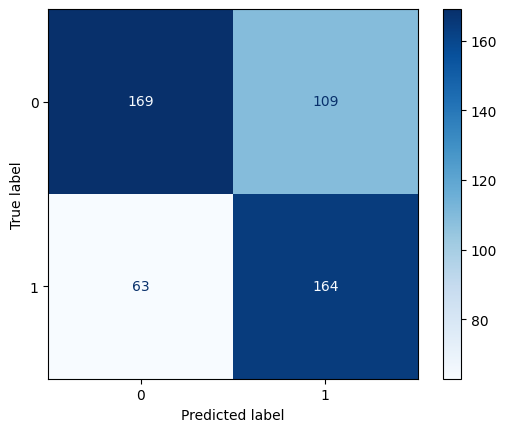

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)


display = ConfusionMatrixDisplay(confusion_matrix = cm)
display.plot(cmap="Blues", values_format="d")
plt.show()


#19 What are the top 3 movies based on the test set? Which variables are most important in predicting the top 3 movies?

In [114]:
"""
Most important variables are budget and the number of critics for reviews, the rest have smaller importances that sum up to be impactful
"""
clear_output()

In [104]:
y_pred_series = pd.Series(y_pred_test, name='Predicted Rating')
X_preds_concat = pd.concat([y_pred_series, X_test.reset_index()], axis=1)
df_movies_with_index = df_movies_dropped.reset_index()

cols_to_keep = ['index', 'movie_title']


#top 5 predicted rated movies
df_final = pd.merge(df_movies_with_index[cols_to_keep], X_preds_concat, on="index", how="inner")


df_final.sort_values(by='imdb_score', ascending=False).head()

# Top 3 movies by imdb score, Gof

,index,movie_title,Predicted Rating,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_Color,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Chinese,language_Czech,language_Danish,language_Dari,language_Dutch,language_Dzongkha,language_English,language_Filipino,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Hungarian,language_Icelandic,language_Indonesian,language_Italian,language_Japanese,language_Kannada,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_Norwegian,language_Panjabi,language_Persian,language_Polish,language_Portuguese,language_Romanian,language_Russian,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Bahamas,country_Belgium,country_Brazil,country_Bulgaria,country_Cambodia,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Dominican Republic,country_Egypt,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Kenya,country_Kyrgyzstan,country_Libya,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Nigeria,country_Norway,country_Official site,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Romania,country_Russia,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany
284,2837,The Godfather: Part II,0,149.0,220.0,0.000000,3000.0,22000.0,790926.0,39960.0,1.0,650.0,1.300000e+07,1974.000000,14000.0,9.0,1.85,14000.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
9,96,Interstellar,0,712.0,169.0,22000.000000,6000.0,11000.0,928227.0,31488.0,1.0,2725.0,1.650000e+08,2014.000000,11000.0,8.6,2.35,349000.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
153,1499,Luther,0,51.0,60.0,686.509212,256.0,2000.0,70568.0,3823.0,1.0,105.0,3.975262e+07,2002.470517,729.0,8.6,16.00,20000.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False

In [109]:
X_preds_concat.head()

,Predicted Rating,index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_Color,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Chinese,language_Czech,language_Danish,language_Dari,language_Dutch,language_Dzongkha,language_English,language_Filipino,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Hungarian,language_Icelandic,language_Indonesian,language_Italian,language_Japanese,language_Kannada,language_Kazakh,language_Korean,language_Mandarin,language_Maya,language_Mongolian,language_Norwegian,language_Panjabi,language_Persian,language_Polish,language_Portuguese,language_Romanian,language_Russian,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu,country_Argentina,country_Aruba,country_Australia,country_Bahamas,country_Belgium,country_Brazil,country_Bulgaria,country_Cambodia,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Dominican Republic,country_Egypt,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Kenya,country_Kyrgyzstan,country_Libya,country_Mexico,country_Netherlands,country_New Line,country_New Zealand,country_Nigeria,country_Norway,country_Official site,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Romania,country_Russia,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany
0,0,4809,76.0,91.0,0.0,92.0,440.0,19964.0,809.0,0.0,197.0,400000.0,1972.0,132.0,8.2,1.66,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,1,3299,117.0,119.0,188.0,35.0,187.0,27536.0,358.0,4.0,327.0,8500000.0,2000.0,127.0,6.7,1.85,1000.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0,134,526.0,113.0,13000.0,16000.0,40000.0,199039.0,80849.0,7.0,479.0,100000000.0,2012.0,17000.0,6.2,1.85,82000.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

#20 Summarize what you learned along the way and make recommendations on how this could be used moving forward, being careful not to over promise.

In [107]:
"""

Our Model is certainly effective at classifying movies as being R rated or not R rated, but some of the metrics could certainly use work. Going forward we want to try and push our recall up without compromising and losing
precison. Currently, precision is our worst metric, we classify tons of non-R movies as R movies, so that will certainly be a point of focus. Other than that, the model works on a relatively small scale, from here we will
likely begin scaling up the number of features as well as the encoding and imputation approaches. 

"""
clear_output()